#Greenhouse Gas Emissions in the World

##Importing Libraries

In [1]:
!pip install opendatasets
!pip install bar_chart_race
!pip install countrygroups

In [2]:
import opendatasets as od
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bar_chart_race as bcr
import seaborn as sns
from countrygroups import EUROPEAN_UNION, ARAB_GROUP, LLDC, LDC, EIG, BRICS, OECD #https://pypi.org/project/countrygroups/
from six import text_type
%matplotlib inline
#sns.set_style("whitegrid")
#sns.set_palette("tab10")
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode,iplot
plt.style.use('seaborn-notebook')

##Importing and Arranging Datasets

In [3]:
od.download("https://www.kaggle.com/ankanhore545/all-greenhouse-gas-emissions-in-the-world") #main dataset
od.download("https://www.kaggle.com/paultimothymooney/latitude-and-longitude-for-every-country-and-state") #dataset required to create the map

Skipping, found downloaded files in "./all-greenhouse-gas-emissions-in-the-world" (use force=True to force download)
Skipping, found downloaded files in "./latitude-and-longitude-for-every-country-and-state" (use force=True to force download)


In [4]:
#Reading the main dataset and checking its first 5 lines
df_dir=Path("/content/all-greenhouse-gas-emissions-in-the-world/ALL GHG_historical_emissions.csv")
df=pd.read_csv(df_dir)
df.head()

Country Data source                Sector      Gas    Unit  \
0                World        CAIT  Total including LUCF  All GHG  MtCO₂e   
1                China        CAIT  Total including LUCF  All GHG  MtCO₂e   
2        United States        CAIT  Total including LUCF  All GHG  MtCO₂e   
3                India        CAIT  Total including LUCF  All GHG  MtCO₂e   
4  European Union (27)        CAIT  Total including LUCF  All GHG  MtCO₂e   

       2018      2017      2016      2015      2014  ...      1999      1998  \
0  48939.71  47990.47  47413.95  46760.47  46647.29  ...  34948.94  34929.19   
1  11705.81  11408.26  11207.66  11149.68  11155.76  ...   4053.37   4103.23   
2   5794.35   5613.64   5676.92   5586.69   5711.15  ...   6291.25   6293.80   
3   3346.63   3202.82   3073.24   3002.17   2988.34  ...   1460.24   1382.26   
4   3333.16   3401.95   3387.97   3046.38   2990.49  ...   3934.85   4008.29   

       1997      1996      1995      1994      1993      1992      1991  \
0  35387.89  34068.91  33703.46  32977.47  32766.49  32670.32  32813.46   
1   3963.61   3954.75   3918.30   3528.81   3377.79   3154.54   3023.38   
2   6258.47   6010.62   5843.90   5782.20   5691.26   5583.80   5501.92   
3   1348.09   1289.63   1240.44   1174.78   1128.44   1096.71   1064.49   
4   4048.58   4126.40   4018.79   3968.32   3984.95   4058.11   4202.13   

       1990  
0  32645.91  
1   2873.71  
2   5543.47  
3   1009.44  
4   4279.18  

[5 rows x 34 columns]

In [5]:
df.iloc[:,:].nunique() #checking if the data source, sector, gas, unit columns have any unique values

Country        195
Data source      1
Sector           1
Gas              1
Unit             1
2018           190
2017           190
2016           191
2015           193
2014           193
2013           193
2012           192
2011           193
2010           191
2009           193
2008           193
2007           192
2006           190
2005           193
2004           194
2003           194
2002           192
2001           191
2000           194
1999           192
1998           192
1997           189
1996           188
1995           192
1994           193
1993           191
1992           193
1991           192
1990           190
dtype: int64

In [6]:
df = df.drop(['Data source','Sector','Gas','Unit'], axis = 1) #since there is no unique values in these colums these columns are dropped
df.head(7)

Country      2018      2017      2016      2015      2014  \
0                World  48939.71  47990.47  47413.95  46760.47  46647.29   
1                China  11705.81  11408.26  11207.66  11149.68  11155.76   
2        United States   5794.35   5613.64   5676.92   5586.69   5711.15   
3                India   3346.63   3202.82   3073.24   3002.17   2988.34   
4  European Union (27)   3333.16   3401.95   3387.97   3046.38   2990.49   
5               Russia   1992.08   1939.26   1918.26   1791.21   1841.26   
6            Indonesia   1703.86   1466.05   1453.23   2070.24   2016.28   

       2013      2012      2011      2010  ...      1999      1998      1997  \
0  46047.13  45427.61  44891.40  44758.58  ...  34948.94  34929.19  35387.89   
1  11144.76  10690.04  10364.83   9872.37  ...   4053.37   4103.23   3963.61   
2   5690.79   5550.87   5796.78   6041.59  ...   6291.25   6293.80   6258.47   
3   2816.49   2758.53   2610.32   2576.93  ...   1460.24   1382.26   1348.09   
4   3136.34   3213.21   3274.40   3646.50  ...   3934.85   4008.29   4048.58   
5   1844.48   1886.41   1864.86   1690.93  ...   1772.68   1740.23   1755.59   
6   1636.17   1695.27   1675.72   1125.25  ...   1261.56   1373.56   2142.82   

       1996      1995      1994      1993      1992      1991      1990  
0  34068.91  33703.46  32977.47  32766.49  32670.32  32813.46  32645.91  
1   3954.75   3918.30   3528.81   3377.79   3154.54   3023.38   2873.71  
2   6010.62   5843.90   5782.20   5691.26   5583.80   5501.92   5543.47  
3   1289.63   1240.44   1174.78   1128.44   1096.71   1064.49   1009.44  
4   4126.40   4018.79   3968.32   3984.95   4058.11   4202.13   4279.18  
5   1889.18   1930.88   2011.47   2294.62   2551.94   2788.70   2885.12  
6   1179.00   1360.88   1327.87   1311.27   1295.01   1274.43   1257.10  

[7 rows x 30 columns]

In [7]:
df = df.replace("Czech Republic","Czechia") #since the official name is changed the dataset column name is changed

In [8]:
df = df.drop(df.index[[0]])
df = df.drop(df.index[[3]])
df.head()

Country      2018      2017      2016      2015      2014      2013  \
1          China  11705.81  11408.26  11207.66  11149.68  11155.76  11144.76   
2  United States   5794.35   5613.64   5676.92   5586.69   5711.15   5690.79   
3          India   3346.63   3202.82   3073.24   3002.17   2988.34   2816.49   
5         Russia   1992.08   1939.26   1918.26   1791.21   1841.26   1844.48   
6      Indonesia   1703.86   1466.05   1453.23   2070.24   2016.28   1636.17   

       2012      2011     2010  ...     1999     1998     1997     1996  \
1  10690.04  10364.83  9872.37  ...  4053.37  4103.23  3963.61  3954.75   
2   5550.87   5796.78  6041.59  ...  6291.25  6293.80  6258.47  6010.62   
3   2758.53   2610.32  2576.93  ...  1460.24  1382.26  1348.09  1289.63   
5   1886.41   1864.86  1690.93  ...  1772.68  1740.23  1755.59  1889.18   
6   1695.27   1675.72  1125.25  ...  1261.56  1373.56  2142.82  1179.00   

      1995     1994     1993     1992     1991     1990  
1  3918.30  3528.81  3377.79  3154.54  3023.38  2873.71  
2  5843.90  5782.20  5691.26  5583.80  5501.92  5543.47  
3  1240.44  1174.78  1128.44  1096.71  1064.49  1009.44  
5  1930.88  2011.47  2294.62  2551.94  2788.70  2885.12  
6  1360.88  1327.87  1311.27  1295.01  1274.43  1257.10  

[5 rows x 30 columns]

##Creating Bar Chart Race for Different Country Groups 

###Setting the country groups

In [9]:
#Creating sets consisting of differently grouped countries
eu_set=set(EUROPEAN_UNION.names)

arab_set=set(ARAB_GROUP.names)
arab_set.remove("Palestine") #we have to delete it since it was not in the dataset

eig_set=set(EIG.names)#environmental integrity group 
eig_set.remove("Monaco") #we have to delete it since it was not in the dataset

brics_set=set(BRICS.names) #brazil, russia, india, china, and south africa

oecd_set=set(OECD.names) #organisation for economic co-operation and development
oecd_set.remove("USA") #name is different in two datasets, changing it into the main one's form
oecd_set.add("United States")

###Arranging the main dataframe to fit into the function

In [10]:
#making the dataframe ready for the bar_chart_race
bcr_df=df.T #taking transpose to have countries at top and years as rows
bcr_df.rename(columns=bcr_df.iloc[0], inplace = True) #renaming column names to country names
bcr_df.drop(bcr_df.index[0], inplace = True) #dropping the column where country names were
bcr_df=bcr_df.reindex(index=bcr_df.index[::-1]) #reversing the years from past to 2018
bcr_df.head() #controlling the changes


China United States    India   Russia Indonesia   Brazil    Japan  \
1990  2873.71       5543.47  1009.44  2885.12    1257.1  1642.29  1109.37   
1991  3023.38       5501.92  1064.49   2788.7   1274.43  1669.56  1123.86   
1992  3154.54        5583.8  1096.71  2551.94   1295.01   1679.5  1137.15   
1993  3377.79       5691.26  1128.44  2294.62   1311.27   1689.7  1129.63   
1994  3528.81        5782.2  1174.78  2011.47   1327.87  1706.03  1186.79   

        Iran  Germany  Canada  ...  Fiji Micronesia Marshall Islands Dominica  \
1990  240.54  1109.28  626.36  ... -0.72        NaN              NaN     0.24   
1991  280.88  1079.69  622.29  ...  -0.7      -0.02             0.03     0.24   
1992  301.84  1032.01  638.22  ... -0.65       0.09             0.11     0.26   
1993  300.14  1024.31  636.25  ... -0.59       0.09             0.11     0.26   
1994  332.67  1011.41  656.82  ... -0.54        0.1             0.12     0.26   

     Liechtenstein Kiribati Cook Islands Nauru Tuvalu  Niue  
1990          0.25     0.04         0.03  0.13   0.02  0.01  
1991          0.25     0.04         0.03  0.13   0.02  0.01  
1992          0.26     0.04         0.03  0.13   0.02  0.01  
1993          0.26     0.05         0.03  0.12   0.02  0.01  
1994          0.25     0.04         0.03  0.12   0.02  0.01  

[5 rows x 193 columns]

In [11]:
bcr_df = bcr_df.apply(pd.to_numeric) #changing the data types of columns from object to float 
bcr_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29 entries, 1990 to 2018
Columns: 193 entries, China to Niue
dtypes: float64(193)
memory usage: 44.0+ KB


###Racing bar charts

In [12]:
bcr.bar_chart_race(
    df=bcr_df.loc[:,eu_set],
    filename=None,
    orientation='h',
    sort='desc',
    #n_bars= default is all,
    fixed_order=False,
    fixed_max=True,
    #steps_per_period= default is 10
    period_length= 700,
    #interpolate_period= default false
    label_bars=True,
    bar_size=.90, #default .95
    period_label={'x':.99, 'y':.1,'ha':'right','va':'center'},
    #period_summary_func=
    figsize=(0.2*len(eu_set),0.2*len(eu_set)), #default (6,3.5)
    cmap='dark24',
    title='Greenhouse Gas Emissions of European Union Countries',
    title_size=10,
    bar_label_size=7.5,
    tick_label_size=7.5,
    shared_fontdict={'weight':'bold'},
    scale='linear',
    fig=None,
    bar_kwargs={'alpha':.7},
    filter_column_colors=True,
)

In [13]:
bcr.bar_chart_race(
    df=bcr_df.loc[:,arab_set],
    filename=None,
    orientation='h',
    sort='desc',
    #n_bars= default is all,
    fixed_order=False,
    fixed_max=True,
    #steps_per_period= default is 10
    period_length= 700,
    #interpolate_period= default false
    label_bars=True,
    bar_size=.90, #default .95
    period_label={'x':.99, 'y':.1,'ha':'right','va':'center'},
    #period_summary_func=
    figsize=(0.2*len(arab_set),0.2*len(arab_set)), #default (6,3.5)
    cmap='dark24',
    title='Greenhouse Gas Emissions of Arab Group Countries',
    title_size=10,
    bar_label_size=7.5,
    tick_label_size=7.5,
    shared_fontdict={'weight':'bold'},
    scale='linear',
    fig=None,
    bar_kwargs={'alpha':.7},
    filter_column_colors=True,
)

In [14]:
bcr.bar_chart_race(
    df=bcr_df.loc[:,eig_set],
    filename=None,
    orientation='h',
    sort='desc',
    #n_bars= default is all,
    fixed_order=False,
    fixed_max=True,
    #steps_per_period= default is 10
    period_length= 700,
    #interpolate_period= default false
    label_bars=True,
    bar_size=.90, #default .95
    period_label={'x':.99, 'y':.1,'ha':'right','va':'center'},
    #period_summary_func=
    figsize=(0.8*len(eig_set),0.8*len(eig_set)), #default (6,3.5)
    cmap='dark24',
    title='Greenhouse Gas Emissions of\nEnvironmental Integrity Group Countries',
    title_size=8,
    bar_label_size=7.5,
    tick_label_size=7.5,
    shared_fontdict={'weight':'bold'},
    scale='linear',
    fig=None,
    bar_kwargs={'alpha':.7},
    filter_column_colors=True,
)

In [15]:
bcr.bar_chart_race(
    df=bcr_df.loc[:,brics_set],
    filename=None,
    orientation='h',
    sort='desc',
    #n_bars= default is all,
    fixed_order=False,
    fixed_max=True,
    #steps_per_period= default is 10
    period_length= 700,
    #interpolate_period= default false
    label_bars=True,
    bar_size=.90, #default .95
    period_label={'x':.99, 'y':.1,'ha':'right','va':'center'},
    #period_summary_func=
    figsize=(0.8*len(brics_set),0.8*len(brics_set)), #default (6,3.5)
    cmap='dark24',
    title='Greenhouse Gas Emissions of BRICS Countries',
    title_size=10,
    bar_label_size=7.5,
    tick_label_size=7.5,
    shared_fontdict={'weight':'bold'},
    scale='linear',
    fig=None,
    bar_kwargs={'alpha':.7},
    filter_column_colors=True,
)

In [16]:
bcr.bar_chart_race(
    df=bcr_df.loc[:,oecd_set],
    filename=None,
    orientation='h',
    sort='desc',
    #n_bars= default is all,
    fixed_order=False,
    fixed_max=True,
    #steps_per_period= default is 10
    period_length= 700,
    #interpolate_period= default false
    label_bars=True,
    bar_size=.90, #default .95
    period_label={'x':.99, 'y':.1,'ha':'right','va':'center'},
    #period_summary_func=
    figsize=(6,0.2*len(oecd_set)), #default (6,3.5)
    cmap='dark24',
    title='Greenhouse Gas Emissions of OECD Countries',
    title_size=10,
    bar_label_size=7.5,
    tick_label_size=7.5,
    shared_fontdict={'weight':'bold'},
    scale='linear',
    fig=None,
    bar_kwargs={'alpha':.7},
    filter_column_colors=True,
)

In [17]:
bcr.bar_chart_race(
    df=bcr_df,
    filename=None,
    orientation='h',
    sort='desc',
    n_bars= 10,
    fixed_order=False,
    fixed_max=True,
    #steps_per_period= default is 10
    period_length= 700,
    #interpolate_period= default false
    label_bars=True,
    bar_size=.90, #default .95
    period_label={'x':.99, 'y':.1,'ha':'right','va':'center'},
    #period_summary_func=
    figsize=(6,0.2*10), #default (6,3.5)
    cmap='dark24',
    title='Top 10 Countries with\nthe Highest Greenhouse Gas Emissions',
    title_size=10,
    bar_label_size=7.5,
    tick_label_size=7.5,
    shared_fontdict={'weight':'bold'},
    scale='linear',
    fig=None,
    bar_kwargs={'alpha':.7},
    filter_column_colors=True,
)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 127 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 128 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 129 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 130 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 131 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 132 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 133 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/bac

##Turkey's data over the years

<BarContainer object of 29 artists>

Text(0.5, 0, 'Years')

Text(0, 0.5, 'Gas Emission (MtCO₂e)')

Text(0.5, 1.0, 'Turkey')

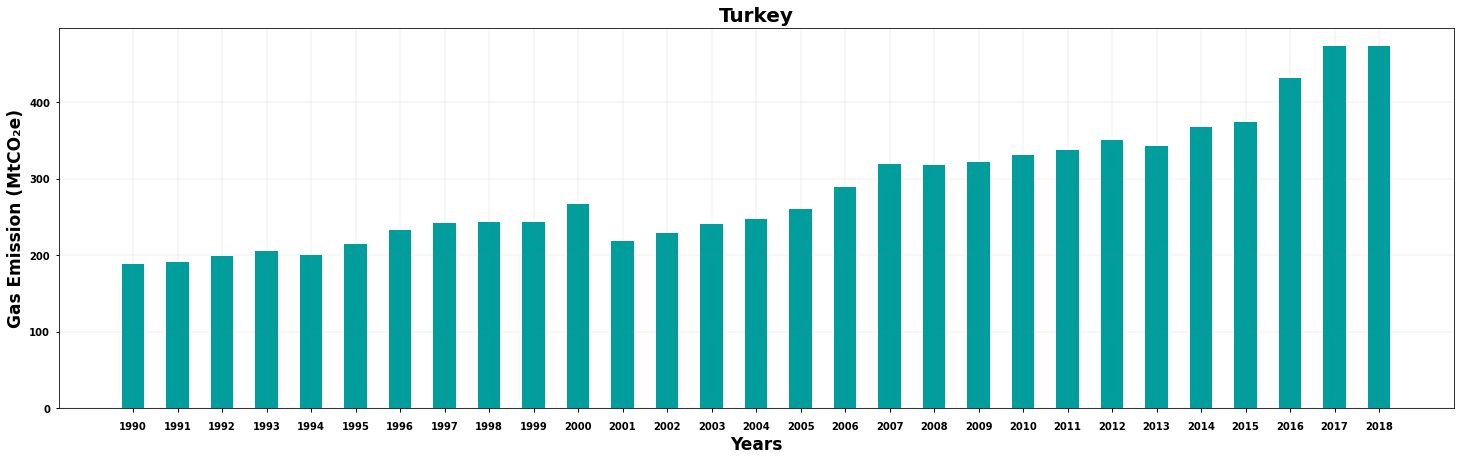

In [18]:
years = bcr_df.index.values.tolist() #creating a list consisting of all the years in the main df
gas_emissions = bcr_df["Turkey"] #taking the values of the Turkey

fig,ax =plt.subplots(figsize=(25,7))
ax.bar(years, gas_emissions, align='center', width=0.5, color="#009D9D")

ax.xaxis.set_tick_params(pad = 10)
ax.yaxis.set_tick_params(pad = 5)

ax.grid(b=True,color="grey",linewidth=0.3, alpha=0.4)

plt.xlabel("Years", fontsize=17, fontweight='bold')
plt.ylabel("Gas Emission (MtCO₂e)", fontsize=17, fontweight='bold')
plt.title("Turkey", fontsize=20, fontweight='bold')

plt.show()

##Showing Greenhouse Gas Emissions of Countries on a Map

###Getting the country locations

In [19]:
#dowloading data to show countries on the map
df_country_dir=Path("/content/latitude-and-longitude-for-every-country-and-state/world_country_and_usa_states_latitude_and_longitude_values.csv")
df_country=pd.read_csv(df_country_dir)
df_country.head()

country_code   latitude  longitude               country usa_state_code  \
0           AD  42.546245   1.601554               Andorra             AK   
1           AE  23.424076  53.847818  United Arab Emirates             AL   
2           AF  33.939110  67.709953           Afghanistan             AR   
3           AG  17.060816 -61.796428   Antigua and Barbuda             AZ   
4           AI  18.220554 -63.068615              Anguilla             CA   

   usa_state_latitude  usa_state_longitude   usa_state  
0           63.588753          -154.493062      Alaska  
1           32.318231           -86.902298     Alabama  
2           35.201050           -91.831833    Arkansas  
3           34.048928          -111.093731     Arizona  
4           36.778261          -119.417932  California

In [20]:
#getting rid of the unnecessary data for our case
df_country=df_country.iloc[:,0:4]
df_country.head()

country_code   latitude  longitude               country
0           AD  42.546245   1.601554               Andorra
1           AE  23.424076  53.847818  United Arab Emirates
2           AF  33.939110  67.709953           Afghanistan
3           AG  17.060816 -61.796428   Antigua and Barbuda
4           AI  18.220554 -63.068615              Anguilla

In [21]:
#changing the column name to be able to merge on
df_country.rename(columns={"country":"Country"},inplace=True)
df_country.rename(columns={"country_code":"iso"},inplace=True)
df_country.head()

iso   latitude  longitude               Country
0  AD  42.546245   1.601554               Andorra
1  AE  23.424076  53.847818  United Arab Emirates
2  AF  33.939110  67.709953           Afghanistan
3  AG  17.060816 -61.796428   Antigua and Barbuda
4  AI  18.220554 -63.068615              Anguilla

###Preparing two datasets to merge

In [22]:
#controlling the shape of the countries df
df_country.shape

(245, 4)

In [23]:
#controlling the shape of the main df
df.shape

(193, 30)

In [24]:
#since there is a difference in the row numbers, we have to control the  data before merging in order to avoid any data loss
map_set=set(df_country.Country.unique()) #all the countries on the countries
real_set=set(df.Country.unique()) #all the countries on the main df

list(real_set-map_set) #showing the ones that exist in the main one but not in the countries list

['Macedonia',
 'Republic of Congo',
 'Czechia',
 'Democratic Republic of the Congo',
 'Myanmar',
 'Sao Tome and Principe',
 'South Sudan',
 'Eswatini']

In [25]:
list(map_set-real_set) #showing the ones that exist in the countries list but not in the main one

['Gibraltar',
 'Puerto Rico',
 'Pitcairn Islands',
 'Congo [Republic]',
 'Falkland Islands [Islas Malvinas]',
 'Anguilla',
 'Vatican City',
 'Greenland',
 'Northern Mariana Islands',
 'Wallis and Futuna',
 'Netherlands Antilles',
 'Bouvet Island',
 'Swaziland',
 'French Guiana',
 'Macau',
 'Tokelau',
 'Hong Kong',
 'British Indian Ocean Territory',
 'Gaza Strip',
 'Montserrat',
 'Svalbard and Jan Mayen',
 'Martinique',
 'Bermuda',
 'Czech Republic',
 'Isle of Man',
 'French Polynesia',
 'Palestinian Territories',
 'New Caledonia',
 'Taiwan',
 'Kosovo',
 'Congo [DRC]',
 'Antarctica',
 'Monaco',
 'Guam',
 'Saint Pierre and Miquelon',
 'South Georgia and the South Sandwich Islands',
 'Jersey',
 'Mayotte',
 'Saint Helena',
 'São Tomé and Príncipe',
 'Christmas Island',
 'San Marino',
 'British Virgin Islands',
 'U.S. Virgin Islands',
 'Myanmar [Burma]',
 'Guadeloupe',
 'U.S. Minor Outlying Islands',
 'Réunion',
 'Cayman Islands',
 'Turks and Caicos Islands',
 'French Southern Territories',

In [26]:
#when we control there are 11 countries that exists in the main but not in the countries list
#two of them are world and eu, when we omit them 9 countries left
#then, we start to compare and all has typo differences in two datasets except south sudan which will be our loss in this case
#if it had had a vital importance, data could have been added manually
df_country = df_country.replace("Myanmar [Burma]","Myanmar")
df_country = df_country.replace("Swaziland","Eswatini")
df_country = df_country.replace("Congo [DRC]","Republic of Congo")
df_country = df_country.replace("Czech Republic","Czechia")
df_country = df_country.replace("Macedonia [FYROM]","Macedonia")
df_country = df_country.replace("São Tomé and Príncipe","Sao Tome and Principe")
df_country = df_country.replace("Congo [Republic]","Democratic Republic of the Congo")
df_country = df_country.replace("United States of America","United States")

In [27]:
#map_df=pd.merge(df_country, df,on="Country")

In [28]:
#df.shape

In [29]:
#map_df.shape #we expect to have 3 lost rows

In [30]:
#df.head()

In [31]:
#map_df.head()

###Creating a new dataframe for mapping

In [32]:
new_df_to_map=pd.DataFrame()

In [33]:
for i in years: #for each country and for each year in the main dataset there will be one row in the map df 
  temp_df=df[["Country"]]
  temp_df["Emission"]=df[[i]]
  temp_df["Year"]=int(i)
  new_df_to_map=pd.concat([new_df_to_map, temp_df], axis=0)
  del temp_df

new_df_to_map.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Country  Emission  Year
1          China   2873.71  1990
2  United States   5543.47  1990
3          India   1009.44  1990
5         Russia   2885.12  1990
6      Indonesia   1257.10  1990

In [34]:
new_df_to_map.shape #it is expected to have 195*29 rows

(5597, 3)

In [1]:
map_df=pd.merge(df_country, new_df_to_map, on="Country")
map_df.sort_values(by = 'Year', inplace = True)
map_df.head(30)

NameError: ignored

In [36]:
colorscale = [[0, 'rgb(224,255,255)'],
            [0.01, 'rgb(51,160,44)'], [0.02, 'rgb(178,223,138)'],
            [0.03, 'rgb(166,206,227)'], [0.05, 'rgb(31,120,180)'],
            [0.10, 'rgb(251,154,153)'], [0.20, 'rgb(255,255,0)'],
            [1, 'rgb(227,26,28)']]

data_bal = []

data_1990 = [dict(type='choropleth',
                colorscale=colorscale,
                autocolorscale = False,
                locations = map_df['Country'],
                z = map_df.Emission[map_df['Year']==1990],
                locationmode = 'country names',
                text = map_df['Country'],
                marker = dict(line = dict(color = 'rgb(255,255,255)',
                                          width = 2)),
                visible = True,
                colorbar = {'title':'Greenhouse Gas Emission (MtCO₂e)'})]


data_bal.extend(data_1990)

for i in years[1:]:
    data_upd = [dict(type='choropleth',
                      colorscale=colorscale,
                      autocolorscale = False,
                      locations = map_df['Country'],
                      z = map_df.Emission[map_df['Year']==int(i)],
                      locationmode = 'country names',
                      text = map_df['Country'],
                      marker = dict(line = dict(color = 'rgb(255,255,255)',
                                                width = 2)),
                      visible = False,
                      colorbar = {'title':'Greenhouse Gas Emission (MtCO₂e)'})]
    
    data_bal.extend(data_upd)


# set menues inside the plot
steps = []
yr = 0
for i in range(0,len(data_bal)):
    step = dict(method = "restyle",
                args = ["visible", [False]*len(data_bal)],
                label = years[yr]) 
    step['args'][1][i] = True
    steps.append(step)
    yr += 1

sliders = [dict(active = 10,
                currentvalue = {"prefix": "Year: "},
                pad = {"t": 50},
                steps = steps)]

# Set the layout
layout = dict(title = 'The Distribution of Greenhouse Gas Emissions in the World',
              geo = dict(scope='world',
                         projection=dict( type='orthographic' ),
                         showlakes = True,
                         lakecolor = 'rgb(255, 255, 255)'),
              sliders = sliders)

fig = dict(data=data_bal, layout=layout)
iplot( fig, filename='d3-cloropleth-map')



#Geospatial Data Visualizations

##Geopandas Dataset

###Importing Libraries

In [ ]:
!pip install geemap
!pip install geopandas
!pip install geoplot

     |████████████████████████████████| 2.0 MB 19.0 MB/s 
     |████████████████████████████████| 1.7 MB 35.7 MB/s 
     |████████████████████████████████| 3.3 MB 62.6 MB/s 
     |████████████████████████████████| 95 kB 3.3 MB/s 
     |████████████████████████████████| 76 kB 5.2 MB/s 
     |████████████████████████████████| 98 kB 6.8 MB/s 
     |████████████████████████████████| 8.7 MB 32.4 MB/s 
     |████████████████████████████████| 130 kB 68.4 MB/s 
     |████████████████████████████████| 44 kB 2.3 MB/s 
     |████████████████████████████████| 99 kB 8.9 MB/s 
     |████████████████████████████████| 1.2 MB 65.9 MB/s 
     |████████████████████████████████| 5.4 MB 51.5 MB/s 
     |████████████████████████████████| 187 kB 41.2 MB/s 
     |████████████████████████████████| 216 kB 43.7 MB/s 
     |████████████████████████████████| 1.3 MB 48.5 MB/s 
     |████████████████████████████████| 97 kB 5.8 MB/s 
     |████████████████████████████████| 53 kB 1.9 MB/s 
     |██████████████████████

     |████████████████████████████████| 1.0 MB 23.2 MB/s 
     |████████████████████████████████| 16.7 MB 49.8 MB/s 
     |████████████████████████████████| 10.8 MB 44.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 39.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 40.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 12.1 MB 39.8 MB/s 


In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import geemap
import os
import geopandas
import io
import geoplot
# for enlarging the all map size
plt.rcParams['figure.figsize'] = [10, 10]

###Exploring the dataset

In [ ]:
# two geo dataframes
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
cities = geopandas.read_file(geopandas.datasets.get_path('naturalearth_cities'))

In [ ]:
# summary of world dataset
world.info()

In [ ]:
# editing data
world = world[(world.pop_est>0) & (world.name!="Antarctica")]

###Plotting the dataset

In [ ]:
# plotting continents of map with legend
from mpl_toolkits.axes_grid1 import make_axes_locatable
fig, ax = plt.subplots(1, 1)
map_cont = world.plot(column='continent',
           ax=ax,
           legend=True)
plt.figure(figsize = (10,10))
           
                        
#turning off x and y axes:
map_cont.set_axis_off();

In [ ]:
# map of world population density
from mpl_toolkits.axes_grid1 import make_axes_locatable
fig, ax = plt.subplots(1, 1)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
map_pop = world.plot(column='pop_est', ax=ax, legend=True, cax=cax)

map_pop.set_axis_off();

In [ ]:
# showing world capital cities on the map
base = world.plot(color='white', edgecolor='black')
cap_cities = cities.plot(ax=base, marker='o', color='red', markersize=5);

cap_cities.set_axis_off();

##Airbnb Dataset

###Importing libraries

In [ ]:
# importing libraries
import numpy as np 
import geopandas as gpd
import pandas as pd
import shapely.geometry as shp
import matplotlib.pyplot as plt


###Getting dataset

http://insideairbnb.com/get-the-data.html

In [ ]:
# connecting drive to the colab
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
# reading csv file from drive
evler=pd.read_csv('/content/gdrive/My Drive/veri/listings.csv')

In [ ]:
evler.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')

In [ ]:
# creating a columns with longitude and latitude
evler['geometry']=evler[['longitude','latitude']].apply(shp.Point, axis=1)

/usr/local/lib/python3.7/dist-packages/pandas/core/dtypes/cast.py:118: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


In [ ]:
#converting geodataframe
evler=gpd.GeoDataFrame(evler)

In [ ]:
# creating coordinates
evler.crs={'init':'epsg:4329'}

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [ ]:
# looking at the coordinates
evler.crs

<Geographic 2D CRS: +init=epsg:4329 +type=crs>
Name: WGS 84 (3D)
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- name: World: Afghanistan, Albania, Algeria, American Samoa, Andorra, Angola, Anguilla, Antarctica, Antigua and Barbuda, Argentina, Armenia, Aruba, Australia, Austria, Azerbaijan, Bahamas, Bahrain, Bangladesh, Barbados, Belgium, Belgium, Belize, Benin, Bermuda, Bhutan, Bolivia, Bonaire, Saint Eustasius and Saba, Bosnia and Herzegovina, Botswana, Bouvet Island, Brazil, British Indian Ocean Territory, British Virgin Islands, Brunei Darussalam, Bulgaria, Burkina Faso, Burundi, Cambodia, Cameroon, Canada, Cape Verde, Cayman Islands, Central African Republic, Chad, Chile, China, Christmas Island, Cocos (Keeling) Islands, Comoros, Congo, Cook Islands, Costa Rica, Côte d'Ivoire (Ivory Coast), Croatia, Cuba, Curacao, Cyprus, Czechia, Denmark, Djibouti, Dominica, Dominican Republic, East Timor, Ecuador, Egypt, El Salvador, Equato

In [ ]:
evler.head()

id                                  name  host_id host_name  \
0  20815     The Bosphorus from The Comfy Hill    78838    Gülder   
1  27271  Lovely apartment in perfect location   117026     Mutlu   
2  28277      Duplex Apartment 11 with Terrace   121607      Alen   
3  28318       Cosy home overlooking Bosphorus   121721     Aydin   
4  29241         ↪ Istanbul, Your second house   125742     Şevki   

   neighbourhood_group neighbourhood  latitude  longitude        room_type  \
0                  NaN      Besiktas  41.06976   29.04379  Entire home/apt   
1                  NaN       Beyoglu  41.03254   28.98153  Entire home/apt   
2                  NaN         Sisli  41.04672   28.98402  Entire home/apt   
3                  NaN       Sariyer  41.09104   29.05580  Entire home/apt   
4                  NaN       Beyoglu  41.04803   28.95227     Private room   

   price  minimum_nights  number_of_reviews last_review  reviews_per_month  \
0   1235             365                 41  2018-11-07               0.29   
1    408              30                  2  2018-05-04               0.02   
2    688              14                  1  2021-05-15               0.13   
3   1412               3                  0         NaN                NaN   
4    515               3                  0         NaN                NaN   

   calculated_host_listings_count  availability_365  number_of_reviews_ltm  \
0                               2               363                      0   
1                               1               333                      0   
2                              16               357                      1   
3                               1                88                      0   
4                               1               365                      0   

   license                   geometry  
0      NaN  POINT (29.04379 41.06976)  
1      NaN  POINT (28.98153 41.03254)  
2      NaN  POINT (28.98402 41.04672)  
3      NaN  POINT (29.05580 41.09104)  
4      NaN  POINT (28.95227 41.04803)

#Visualization

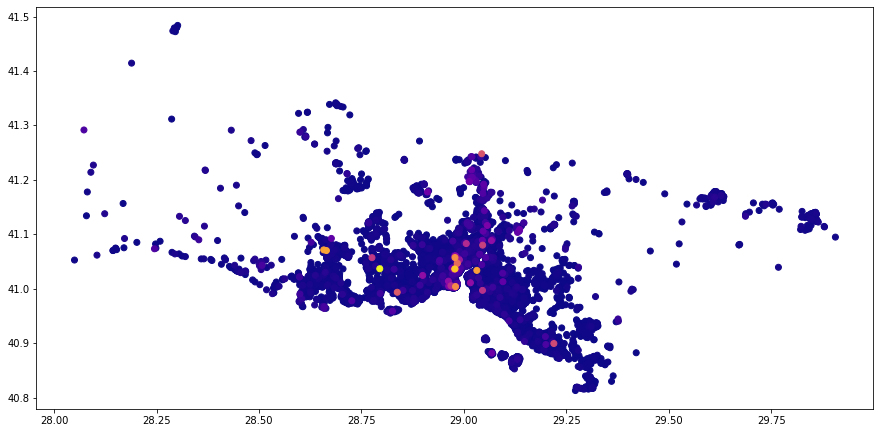

In [ ]:
# visualization by price
evler.sort_values('price').plot('price', cmap='plasma', figsize=(15,15))

In [ ]:
# reading geojson file from drive
ist_ilce=gpd.read_file('/content/gdrive/My Drive/veri/neighbourhoods.geojson')

In [ ]:
ist_ilce.head()

neighbourhood neighbourhood_group  \
0          Sile                None   
1       Catalca                None   
2          Eyup                None   
3       Sariyer                None   
4    Arnavutkoy                None   

                                            geometry  
0  MULTIPOLYGON (((29.40004 41.08274, 29.40101 41...  
1  MULTIPOLYGON (((28.53614 41.10624, 28.53185 41...  
2  MULTIPOLYGON (((28.94881 41.26322, 28.94760 41...  
3  MULTIPOLYGON (((29.05429 41.08144, 29.05436 41...  
4  MULTIPOLYGON (((28.81849 41.13628, 28.80986 41...

In [ ]:
# dropping the NaN values
evler2=evler.dropna(subset=['name'])

In [ ]:
#python string operation
evler2.loc[evler2['name'].str.contains('metrobüs')]

id                                               name    host_id  \
2257   10932179  Cozy home with balcony close to metrobüs and m...   56677778   
2803   15352408  Ferah aydınlık he huzurlu metro ve metrobüse 5...   72694624   
3330   20784335  haramidere metrobüs /opposite haramidere metrobus   84972136   
3717   23605973       Deniz manzaralı metrobüse yürüme mesafesinde  176551435   
4410   27771225   yanyana sıralı bina, metrobüs , havaş otobüsleri  209680493   
4668   28708719                beşyol metrobüs durağında 3+1 daire  214002970   
4670   28728456   Cadde üzerinde metrobüse 2.dk yürüme mesafesinde  216695667   
4980   29911367  Metro, otobüs, metrobüs, dolmuş, 1 dakika merk...  223988779   
4982   29912167  Metro, metrobüs, tramvay, otobüs, dolmuş 1 dakika  223988779   
5457   31773624     3+1 evimiz metrobüse 10 dakika yürüme mesafesi  238207407   
7251   36422922                               Metro metrobüse 5 dk  273851724   
7265   36476088             Beşiktaş Dikilitaş metrobüse çok yakın  274253648   
7581   37202132  istanbulda hızlı ulaşım ağı metrobüs yanı;avm ...  280020481   
8567   39095927  merkezi, metro ve metrobüse yakın evde 1 aylık...  299653397   
8633   39212584                  Metro, metrobüs ve tramwaya yakın  299669042   
9083   39946869          Mecidiyeköy merkezde, metrobüse 8 dakika.  307923803   
9142   40031677    Kadıköy'de metrobüsün yanında güvenlikli binada  237076345   
9398   40464890               Merkezi konumda, metrobüs sokağında.  313077172   
11454  44119429          Kadıköyde ve metrobüse her yere yakındır.  354422272   
11534  44217103     Metro ve metrobüse 5 dakika yürüyüşte. Kadıköy  305035999   
11620  44316741                           Şirinevler metrobüs 5 dk  357444518   
12062  45072807     İstanbul Fulya mahallesi metro metrobüse yakın  312777828   
12971  45853057  Metro metrobüse 15 dk yürüyerek Cevahir avm ar...  371743654   
12996  45863336   Kartal yakacık metrobüse 5 dk yürüme Nezih mekan  371817050   
14011  47211722      Bakırköy meydana-metroya metrobüse E5 e yakın  335336245   
14158  47439040  Kadıköy marmaray ve metrobüse 2 dk yürüme mesa...  382961271   
14304  47725816    İstanbul'da metrobüse çok yakın 2+1 açık mutfak  384497072   
14305  47726446  İstanbul'da metrobüse 3 dakika yürüme mesafesinde  384497072   
14372  47781706   İstanbul'un ortak ulaşım alani Marmaray metrobüs  384915622   
14756  48219822                       Bahçelievler metrobüse yakın  389060228   
15552  49206031  Beyoğlu’nda 2+1 balkonlu metrobüse 1 dakika me...  371822203   
16120  49981909         Metro metrobüs on.dk.yürüme mesafesindedir  403075489   
16224  50098872        Şirinevler meydan Metro ve metrobüse 100 mt  404159161   
16956  50783087  My apt stay in Kadıköy/ Hasanpaşa Aria 5 min. ...  410423480   
17110  50866569  Kadıköy merkzde Bağdat cd. metro/metrobüs/marm...  405935287   
17184  50932914  Kristal Şehir Sitesi 21 katta metrobüse çok yakın  399811308   
17225  50953296  Room & Breakfast with cozziness like home, ver...  405909969   
17298  50997192    Kadıköy’de, 1+1, metrobüs ve marmaraya 3 dakika  344003757   
17384  51069725  Üsküdar Kadıköy'e 15.20 dk yakınında   ulaşım ...  413210284   
17422  51100321       İstanbul üniversitesi ve metrobüse çok yakın  158510740   
17565  51257485         Asma kat ücretsiz otopark  metrobüsün dibi  415018405   
17607  51276438  Metro metrobüse 10 dk yürüyerek Cevahir Avm ar...  371743654   
18090  51627736      Kadıköy,rıhtıma,metrobüse,metroya yakın daire  317062269   
18542  51913514     Şişlinin merkezi yerinde metro,metrobüse yakın  420488012   
18745  52078499         Kadiköy Hasanpaşa girişinde metrobüse 3 dk  256957727   
19521  52583635  Kadıköy bölgesinde Fenerbahçe Şükrü Saracoğlu ...  416898447   
19537  52591458  metrobüse 5 dk yürüme mesafesi günlük ve haftalık  425706068   
19575  52617578  kolay ulaşım metroya metrobüse yürüme mesafesi...  425113582   
19599  52626919  Kadıköy bölgesinde belediye

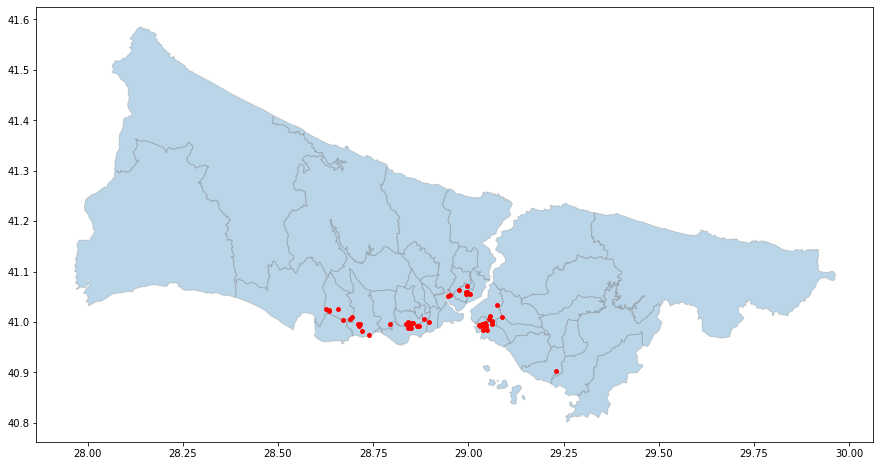

In [ ]:
#plotting
ax=ist_ilce.plot(figsize=(15,15), alpha=0.3, edgecolor='gray')
evler2.loc[evler2['name'].str.contains('metrobüs')].plot(ax=ax, color='red', marker='o', markersize=15)

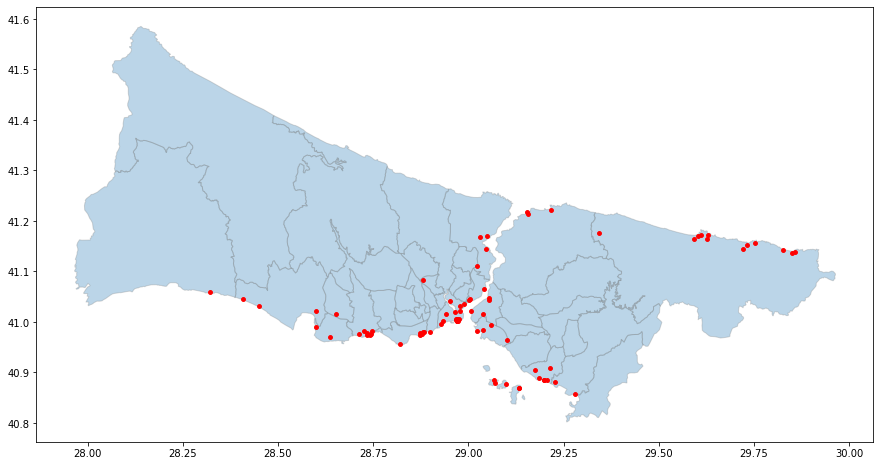

In [ ]:
ax=ist_ilce.plot(figsize=(15,15), alpha=0.3, edgecolor='gray')
evler2.loc[evler2['name'].str.contains('deniz')].plot(ax=ax, color='red', marker='o', markersize=15)

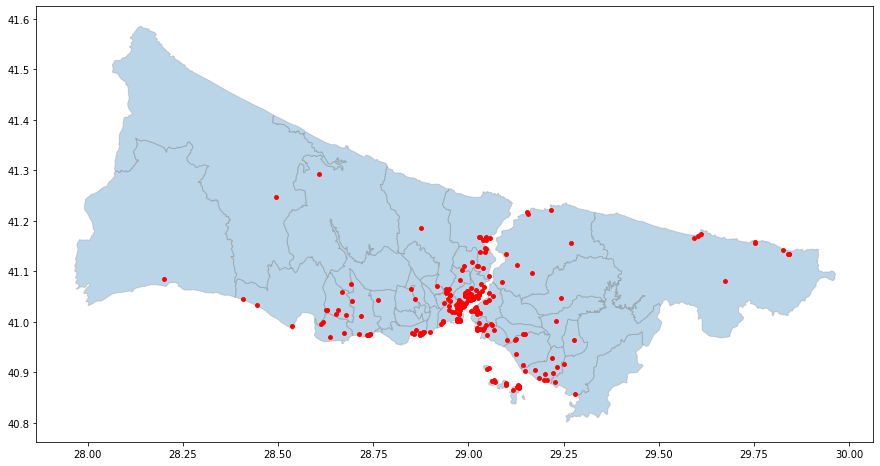

In [ ]:
ax=ist_ilce.plot(figsize=(15,15), alpha=0.3, edgecolor='gray')
evler2.loc[evler2['name'].str.contains('manzara')].plot(ax=ax, color='red', marker='o', markersize=15)

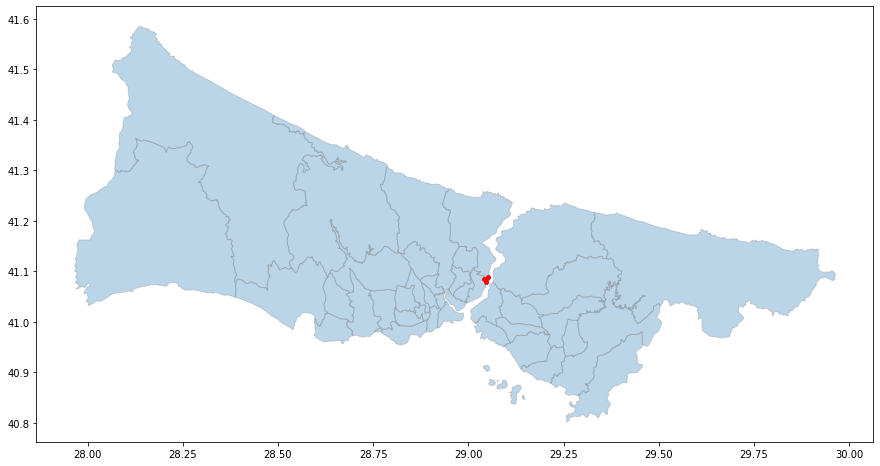

In [ ]:
ax=ist_ilce.plot(figsize=(15,15), alpha=0.3, edgecolor='gray')
evler2.loc[evler2['name'].str.contains('Boğaziçi')].plot(ax=ax, color='red', marker='o', markersize=15)

In [ ]:
from geopandas.tools import sjoin

In [ ]:
# ilce polygon file and evler point based data via special join function to make analysis based on ilce(enlem ve boylamlar hangi ilceye)
birlestirme = gpd.sjoin(evler2, ist_ilce, op='within', how='left')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if self.run_code(code, result):
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: +init=epsg:4329 +type=crs
Right CRS: EPSG:4326

  


ImportError: ignored

In [ ]:
birlestirme.head(19)

id                                            name  host_id  \
0   20815               The Bosphorus from The Comfy Hill    78838   
1   27271            Lovely apartment in perfect location   117026   
2   28277                Duplex Apartment 11 with Terrace   121607   
3   28318                 Cosy home overlooking Bosphorus   121721   
4   29241                   ↪ Istanbul, Your second house   125742   
5   30697                       nice home in popular area   132137   
6   33368               Deluxe double bedroom @ Nisantasi   135136   
7   34177                                     PETIT HOUSE   147330   
8   34925                        A room in galata beyoglu   150435   
9   35580                         Sea View terrace  House   153032   
10  35938                    Cosy Room in Istanbul Center   154245   
11  41753                      Emir Apartment / Penthouse   182639   
12  42246                Room on a Hill - quiet and comfy   184607   
13  44421                    Beautiful Studio With A View   194194   
14  44429  Cozy, central, lovely&check out the bathroom!*   194194   
15  47377                           Double Room in Taksim   214374   
16  48346                 Charming Apartment in Kuzguncuk   220212   
17  52828                      Prince Apartment/Penthouse   182639   
18  73477                 Cozy Flat in center of Istanbul   383789   

       host_name  neighbourhood_group_left neighbourhood_left  latitude  \
0         Gülder                       NaN           Besiktas  41.06976   
1          Mutlu                       NaN            Beyoglu  41.03254   
2           Alen                       NaN              Sisli  41.04672   
3          Aydin                       NaN            Sariyer  41.09104   
4          Şevki                       NaN            Beyoglu  41.04803   
5            Nan                       NaN            Beyoglu  41.03213   
6          Ozlem                       NaN              Sisli  41.05376   
7          Ercan                       NaN           Besiktas  41.06681   
8            Esr                       NaN            Beyoglu  41.02694   
9         Michel                       NaN            Beyoglu  41.03470   
10         Sinan                       NaN              Sisli  41.04962   
11    Mehmet Ali                       NaN            Beyoglu  41.02907   
12          Mina                       NaN           Besiktas  41.06429   
13         Zeyno                       NaN            Beyoglu  41.02942   
14         Zeyno                       NaN            Beyoglu  41.03084   
15  Bertan Kemal                       NaN            Beyoglu  41.03370   
16         Yesim                       NaN            Uskudar  41.03258   
17    Mehmet Ali                       NaN            Beyoglu  41.02690   
18         Berat                       NaN            Beyoglu  41.03441   

    longitude        room_type  price  ...  last_review  reviews_per_month  \
0    29.04379  Entire home/apt   1235  ...   2018-11-07               0.29   
1    28.98153  Entire home/apt    408  ...   2018-05-04               0.02   
2    28.98402  Entire home/apt    688  ...   2021-05-15               0.13   
3    29.05580  Entire home/apt   1412  ...          NaN                NaN   
4    28.95227     Private room    515  ...          NaN                NaN   
5    28.97800     Private room   1166  ...   2010-06-14               0.01   
6    28.99876     Private room    616  ...   2014-10-21               0.01   
7    29.04035  Entire home/apt    412  ...   2016-07-14               0.09   
8    28.97628     Private room    711  ...          NaN                NaN   
9    28.97369  Entire home/apt    315  ...   2021-12-17               0.43   
10   28.99846     Private room    773  ...          NaN                NaN   
11   28.97794  Entire home/apt    805  ...   2017-05-21               0.34   
12   29.03945  Entire home/apt    700  ...   2016-11-07               0.35   
13   28.98154

In [ ]:
# ilce ismine göre fiyat
hesap_ort=birlestirme.groupby(['neighbourhood_right']).mean()

In [ ]:
hesap_ort

id       host_id  neighbourhood_group_left  \
neighbourhood_right                                                         
Adalar               3.609314e+07  1.810554e+08                       NaN   
Arnavutkoy           4.466573e+07  2.879053e+08                       NaN   
Atasehir             4.315560e+07  2.534437e+08                       NaN   
Avcilar              4.183596e+07  2.415517e+08                       NaN   
Bagcilar             4.675000e+07  2.749363e+08                       NaN   
Bahcelievler         4.137804e+07  2.428620e+08                       NaN   
Bakirkoy             4.050125e+07  2.109853e+08                       NaN   
Basaksehir           4.211942e+07  2.387337e+08                       NaN   
Bayrampasa           4.388914e+07  2.839267e+08                       NaN   
Besiktas             3.703647e+07  1.753254e+08                       NaN   
Beykoz               4.118240e+07  2.033529e+08                       NaN   
Beylikduzu           4.391537e+07  2.593687e+08                       NaN   
Beyoglu              3.742628e+07  1.806344e+08                       NaN   
Buyukcekmece         4.083186e+07  2.486725e+08                       NaN   
Catalca              3.618115e+07  2.014153e+08                       NaN   
Cekmekoy             4.255450e+07  2.849536e+08                       NaN   
Esenler              4.282835e+07  2.908939e+08                       NaN   
Esenyurt             4.283379e+07  2.621521e+08                       NaN   
Eyup                 4.009169e+07  2.173026e+08                       NaN   
Fatih                3.487267e+07  1.904139e+08                       NaN   
Gaziosmanpasa        4.425667e+07  2.953906e+08                       NaN   
Gungoren             4.206243e+07  2.464128e+08                       NaN   
Kadikoy              4.031394e+07  1.941593e+08                       NaN   
Kagithane            4.242325e+07  2.404394e+08                       NaN   
Kartal               4.041266e+07  2.267307e+08                       NaN   
Kucukcekmece         4.269233e+07  2.412541e+08                       NaN   
Maltepe              3.997780e+07  2.217199e+08                       NaN   
Pendik               4.437667e+07  2.544395e+08                       NaN   
Sancaktepe           4.122514e+07  2.512983e+08                       NaN   
Sariyer              3.781628e+07  1.848027e+08                       NaN   
Sile                 4.346080e+07  2.522866e+08                       NaN   
Silivri              3.825111e+07  2.062971e+08                       NaN   
Sisli                3.907922e+07  2.149140e+08                       NaN   
Sultanbeyli          4.215822e+07  2.571983e+08                       NaN   
Sultangazi           4.263644e+07  2.868428e+08                       NaN   
Tuzla                4.186298e+07  2.334091e+08                       NaN   
Umraniye             4.334731e+07  2.423998e+08                       NaN   
Uskudar              3.964113e+07  2.254965e+08                       NaN   
Zeytinburnu          4.033443e+07  2.300627e+08                       NaN   

                      latitude  longitude        price  minimum_nights  \
neighbourhood_right                                                      
Adalar               40.874280  29.111017  1052.771186        7.915254   
Arnavutkoy           41.225056  28.701966   976.934783       10.380435   
Atasehir             40.987673  29.111960   580.371105        6.447592   
Avcilar              40.998669  28.718040   619.934884        5.362791   
Bagcilar             41.046829  28.820035   681.298361        6.688525   
Bahcelievler         40.999426  28.840970   760.225926        5.559259   
Bakirkoy             40.980518  28.857522   764.487805        4.616725   
Basaksehir           41.093422  28.765787  1424.625000        8.100000   
Bayrampasa           41.049818  28.900343   507.310345       26.620690   
Besiktas             41.055055  29.013888   817.298601     

In [ ]:
# sıralıyoruz
birles_ort=birlestirme.groupby(['neighbourhood_right']).mean().sort_values('price', ascending=False)

In [ ]:
birles_ort

id       host_id  neighbourhood_group_left  \
neighbourhood_right                                                         
Silivri              3.825111e+07  2.062971e+08                       NaN   
Sariyer              3.781628e+07  1.848027e+08                       NaN   
Beykoz               4.118240e+07  2.033529e+08                       NaN   
Buyukcekmece         4.083186e+07  2.486725e+08                       NaN   
Kucukcekmece         4.269233e+07  2.412541e+08                       NaN   
Basaksehir           4.211942e+07  2.387337e+08                       NaN   
Zeytinburnu          4.033443e+07  2.300627e+08                       NaN   
Catalca              3.618115e+07  2.014153e+08                       NaN   
Beylikduzu           4.391537e+07  2.593687e+08                       NaN   
Fatih                3.487267e+07  1.904139e+08                       NaN   
Sisli                3.907922e+07  2.149140e+08                       NaN   
Adalar               3.609314e+07  1.810554e+08                       NaN   
Kartal               4.041266e+07  2.267307e+08                       NaN   
Sile                 4.346080e+07  2.522866e+08                       NaN   
Beyoglu              3.742628e+07  1.806344e+08                       NaN   
Arnavutkoy           4.466573e+07  2.879053e+08                       NaN   
Gaziosmanpasa        4.425667e+07  2.953906e+08                       NaN   
Besiktas             3.703647e+07  1.753254e+08                       NaN   
Uskudar              3.964113e+07  2.254965e+08                       NaN   
Umraniye             4.334731e+07  2.423998e+08                       NaN   
Eyup                 4.009169e+07  2.173026e+08                       NaN   
Bakirkoy             4.050125e+07  2.109853e+08                       NaN   
Bahcelievler         4.137804e+07  2.428620e+08                       NaN   
Gungoren             4.206243e+07  2.464128e+08                       NaN   
Tuzla                4.186298e+07  2.334091e+08                       NaN   
Esenyurt             4.283379e+07  2.621521e+08                       NaN   
Bagcilar             4.675000e+07  2.749363e+08                       NaN   
Sultangazi           4.263644e+07  2.868428e+08                       NaN   
Avcilar              4.183596e+07  2.415517e+08                       NaN   
Atasehir             4.315560e+07  2.534437e+08                       NaN   
Cekmekoy             4.255450e+07  2.849536e+08                       NaN   
Kagithane            4.242325e+07  2.404394e+08                       NaN   
Pendik               4.437667e+07  2.544395e+08                       NaN   
Kadikoy              4.031394e+07  1.941593e+08                       NaN   
Bayrampasa           4.388914e+07  2.839267e+08                       NaN   
Sancaktepe           4.122514e+07  2.512983e+08                       NaN   
Esenler              4.282835e+07  2.908939e+08                       NaN   
Maltepe              3.997780e+07  2.217199e+08                       NaN   
Sultanbeyli          4.215822e+07  2.571983e+08                       NaN   

                      latitude  longitude        price  minimum_nights  \
neighbourhood_right                                                      
Silivri              41.099089  28.227659  2686.000000        3.222222   
Sariyer              41.145406  29.041561  2588.204620        7.594059   
Beykoz               41.114209  29.145197  2368.456693        4.370079   
Buyukcekmece         41.025259  28.545791  1450.166667        7.033333   
Kucukcekmece         41.020414  28.782258  1435.081081        5.697297   
Basaksehir           41.093422  28.765787  1424.625000        8.100000   
Zeytinburnu          41.002799  28.903441  1253.250000        3.065217   
Catalca              41.311640  28.399902  1226.916667        2.875000   
Beylikduzu           40.993158  28.638731  1134.103175        9.285714   
Fatih                41.009008  28.965136  1127.205186     

In [ ]:
# creating new  column
birlestirme['toplam']=1

In [ ]:
toplamlar = birlestirme.groupby(['neighbourhood_right']).count()['toplam']

In [ ]:
toplamlar

neighbourhood_right
Adalar            236
Arnavutkoy         92
Atasehir          353
Avcilar           215
Bagcilar          305
Bahcelievler      270
Bakirkoy          287
Basaksehir        240
Bayrampasa         29
Besiktas         1430
Beykoz            127
Beylikduzu        126
Beyoglu          6261
Buyukcekmece      120
Catalca            24
Cekmekoy           55
Esenler            18
Esenyurt          626
Eyup              202
Fatih            3124
Gaziosmanpasa      92
Gungoren           59
Kadikoy          2094
Kagithane         483
Kartal            196
Kucukcekmece      185
Maltepe           340
Pendik            215
Sancaktepe         55
Sariyer           303
Sile              224
Silivri            36
Sisli            3099
Sultanbeyli        17
Sultangazi         19
Tuzla              87
Umraniye          247
Uskudar           681
Zeytinburnu        92
Name: toplam, dtype: int64

Text(0.5, 1.0, 'ilcelerdeki airbnb daire sayıları')

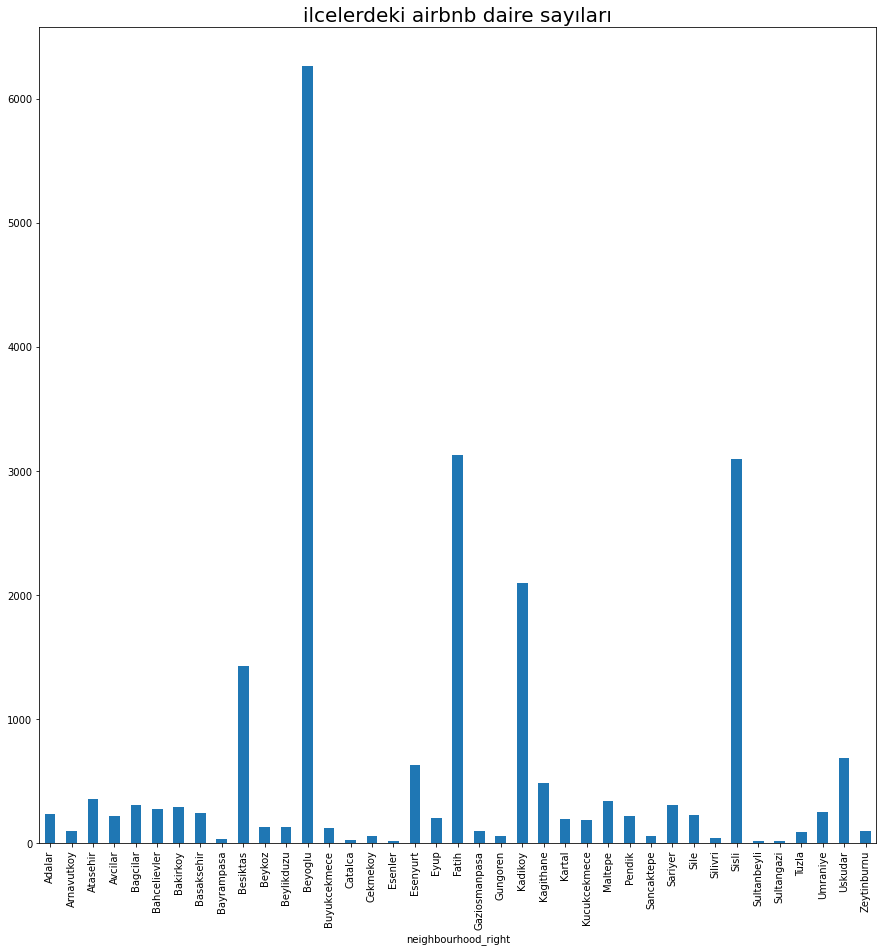

In [ ]:
toplamlar.plot(kind='bar', figsize=(15,15))
plt.title('ilcelerdeki airbnb daire sayıları', fontdict={'fontname': 'DejaVu Sans', 'fontsize':20})

In [ ]:
toplamlar2=toplamlar.to_frame()

In [ ]:
toplamlar2

toplam
neighbourhood_right        
Adalar                  236
Arnavutkoy               92
Atasehir                353
Avcilar                 215
Bagcilar                305
Bahcelievler            270
Bakirkoy                287
Basaksehir              240
Bayrampasa               29
Besiktas               1430
Beykoz                  127
Beylikduzu              126
Beyoglu                6261
Buyukcekmece            120
Catalca                  24
Cekmekoy                 55
Esenler                  18
Esenyurt                626
Eyup                    202
Fatih                  3124
Gaziosmanpasa            92
Gungoren                 59
Kadikoy                2094
Kagithane               483
Kartal                  196
Kucukcekmece            185
Maltepe                 340
Pendik                  215
Sancaktepe               55
Sariyer                 303
Sile                    224
Silivri                  36
Sisli                  3099
Sultanbeyli              17
Sultangazi               19
Tuzla                    87
Umraniye                247
Uskudar                 681
Zeytinburnu              92

In [ ]:
ist_ilce_birles=ist_ilce.merge(birles_ort, left_on='neighbourhood', right_on='neighbourhood_right')

In [ ]:
ist_ilce_birles.head()

neighbourhood neighbourhood_group  \
0          Sile                None   
1       Catalca                None   
2          Eyup                None   
3       Sariyer                None   
4    Arnavutkoy                None   

                                            geometry            id  \
0  MULTIPOLYGON (((29.40004 41.08274, 29.40101 41...  4.346080e+07   
1  MULTIPOLYGON (((28.53614 41.10624, 28.53185 41...  3.618115e+07   
2  MULTIPOLYGON (((28.94881 41.26322, 28.94760 41...  4.009169e+07   
3  MULTIPOLYGON (((29.05429 41.08144, 29.05436 41...  3.781628e+07   
4  MULTIPOLYGON (((28.81849 41.13628, 28.80986 41...  4.466573e+07   

        host_id  neighbourhood_group_left   latitude  longitude        price  \
0  2.522866e+08                       NaN  41.146304  29.730539  1024.803571   
1  2.014153e+08                       NaN  41.311640  28.399902  1226.916667   
2  2.173026e+08                       NaN  41.107069  28.923083   764.623762   
3  1.848027e+08                       NaN  41.145406  29.041561  2588.204620   
4  2.879053e+08                       NaN  41.225056  28.701966   976.934783   

   minimum_nights  number_of_reviews  reviews_per_month  \
0        6.750000           5.008929           0.734404   
1        2.875000           3.250000           0.745455   
2       13.237624           3.678218           0.574756   
3        7.594059           3.759076           0.611280   
4       10.380435           6.108696           0.935370   

   calculated_host_listings_count  availability_365  number_of_reviews_ltm  \
0                        6.924107        268.281250               2.437500   
1                        1.541667        257.750000               2.500000   
2                        2.742574        265.846535               1.049505   
3                        6.511551        277.478548               1.689769   
4                        3.239130        271.934783               3.239130   

   license  index_right  
0      NaN          0.0  
1      NaN          1.0  
2      NaN          2.0  
3      NaN          3.0  
4      NaN          4.0

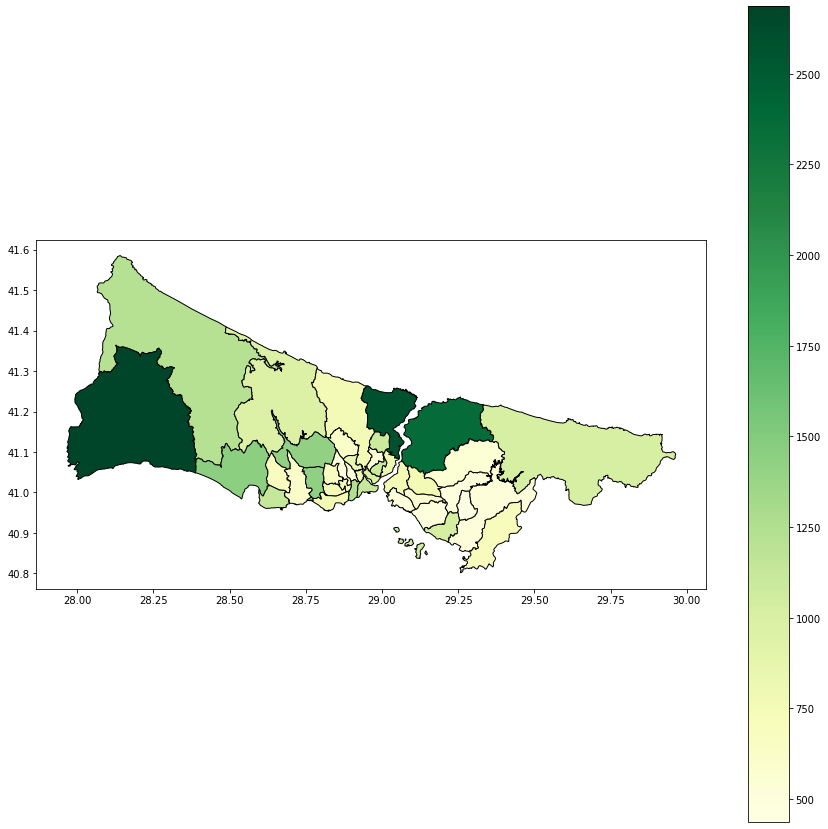

In [ ]:
ax=ist_ilce_birles.plot(figsize=(15,15), column='price', k=10, legend=True, cmap='YlGn', edgecolor='black' )

In [ ]:
ist_secilmis=ist_ilce_birles[(ist_ilce_birles['price']<500)]

In [ ]:
ist_secilmis.head()

neighbourhood neighbourhood_group  \
18       Esenler                None   
24       Maltepe                None   
33   Sultanbeyli                None   

                                             geometry            id  \
18  MULTIPOLYGON (((28.89912 41.02157, 28.89775 41...  4.282835e+07   
24  MULTIPOLYGON (((29.21257 40.97575, 29.21435 40...  3.997780e+07   
33  MULTIPOLYGON (((29.28755 41.00274, 29.28668 40...  4.215822e+07   

         host_id  neighbourhood_group_left   latitude  longitude       price  \
18  2.908939e+08                       NaN  41.048941  28.875717  499.277778   
24  2.217199e+08                       NaN  40.941095  29.131283  499.076471   
33  2.571983e+08                       NaN  40.957647  29.274282  437.176471   

    minimum_nights  number_of_reviews  reviews_per_month  \
18       22.000000           1.388889           0.478571   
24        5.426471           4.600000           0.923681   
33        2.588235           1.000000           0.300000   

    calculated_host_listings_count  availability_365  number_of_reviews_ltm  \
18                        2.722222        315.777778               1.000000   
24                        2.588235        271.638235               2.214706   
33                        4.823529        243.529412               0.352941   

    license  index_right  
18      NaN         18.0  
24      NaN         24.0  
33      NaN         33.0

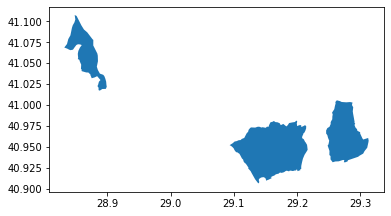

In [ ]:
ist_secilmis.plot()